# Regression Analysis: Car Price Prediction

## Attribute Description

### Independent Variables
**Year:** This column should be filled with the year in which the car was bought.<br>
**Present_price:** This is the current ex-showroom price of the car.<br>
**Kms_Driven:** This is the distance completed by the car in km.<br>
**Fuel_Type:** Fuel type of the car.<br>
**Seller_Type:** Defines whether the seller is a dealer or an individual.<br>
**Transmission:** Defines whether the car is manual or automatic.<br>
**Owner:** Defines the number of owners the car has previously had.<br>

### Target Variable
**Selling_Price:** This column should be filled with the price the owner wants to sell the car at.<br>

# Import Required Libraries

In [5]:
# import pandas for data manipulation
import pandas as pd

# import numpy for advance mathematical functions
import numpy as np

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# import seaborn for data visualization
import seaborn as sns

# Read The Dataset

In [6]:
# read the dataset "car data.csv"
df_car = pd.read_csv('car data.csv')

In [7]:
df_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Check the shape of the dataframe

In [17]:
df_car.shape

(301, 9)

# Check unique classes in a column

In [18]:
df_car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [22]:
# check the unique classes in the column
print(df_car['Transmission'].unique())

['Manual' 'Automatic']


# Look for missing values

In [24]:
# check missing values
df_car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Get the 5-Point summary

In [25]:
df_car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661096,7.628472,36947.205980,0.043189
std,2.891554,5.082884,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Change the column names for better readability

In [26]:
# change the column names
df_final = df_car[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [27]:
# print the first 5 observations
df_car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Exploratory Data Analysis

In [28]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

### Distribution Plot

<AxesSubplot:xlabel='Selling_Price'>

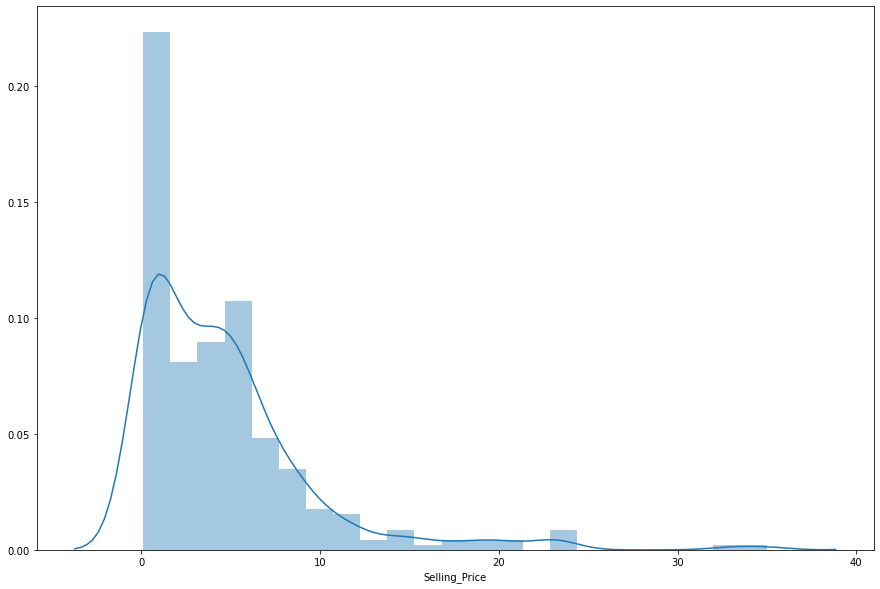

In [29]:
# using seaborn to plot the distribution plot
sns.distplot(df_final.Selling_Price)

### BoxPlot

<AxesSubplot:xlabel='Selling_Price'>

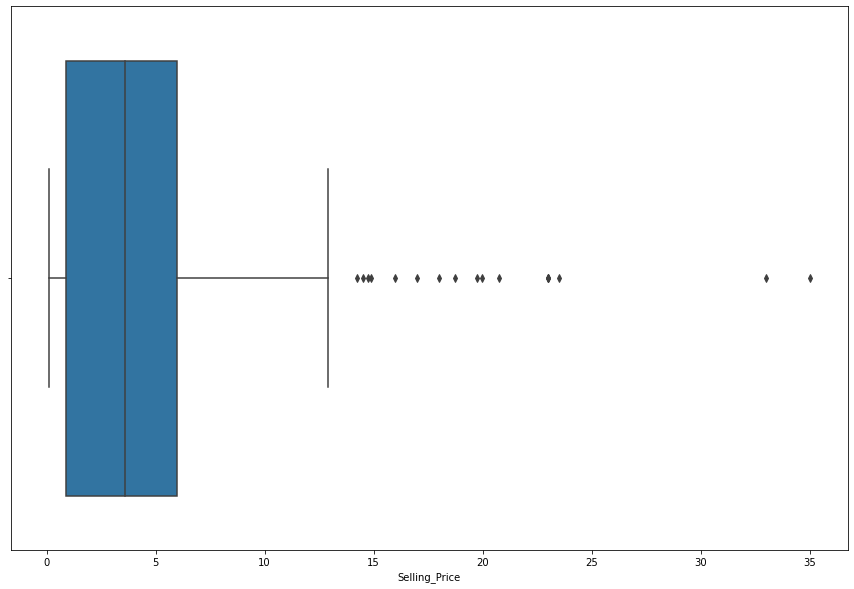

In [30]:
sns.boxplot(df_final.Selling_Price)

# Outlier Analysis

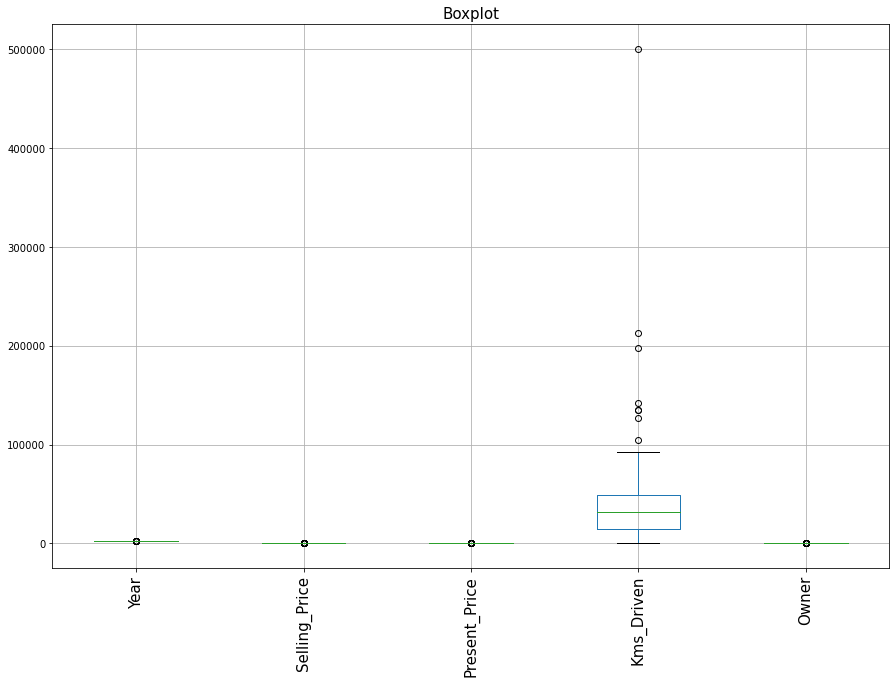

In [32]:
df_final.boxplot()

plt.title('Boxplot', fontsize=15)
plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

#### Remove outliers

In [ ]:
(df_final.Selling_Price)**(0.33333)

np.log1p(df_final.Selling_Price)

In [33]:
df_final.skew()

Year            -1.246189
Selling_Price    2.493419
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
dtype: float64

In [34]:
(np.log1p(df_final.Selling_Price)).skew()

0.1153335037108638

# Feature Engineering

In [ ]:
features --> Columns --> Independent Variables

target --> Dependent Variable

In [39]:
df_final.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Total_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4


In [36]:
df_final['Current_year'] = 2021

#### Creating a column of the current year

In [38]:
df_final['Total_Years'] = df_final['Current_year'] - df_final['Year']

In [40]:
df_final.drop(['Current_year', 'Year'], axis = 1, inplace = True)

#### Subtracting the year of purchase from the current year

#### Drop the column "Year"

# Check Correlation

In [42]:
df_final.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4


In [44]:
corr_mat = df_final.corr()
corr_mat

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Years
Selling_Price,1.000000,0.878987,0.029199,-0.088336,-0.236105
Present_Price,0.878987,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029199,0.203647,1.000000,0.089216,0.524342
Owner,-0.088336,0.008057,0.089216,1.000000,0.182104
Total_Years,-0.236105,0.047584,0.524342,0.182104,1.000000


<AxesSubplot:>

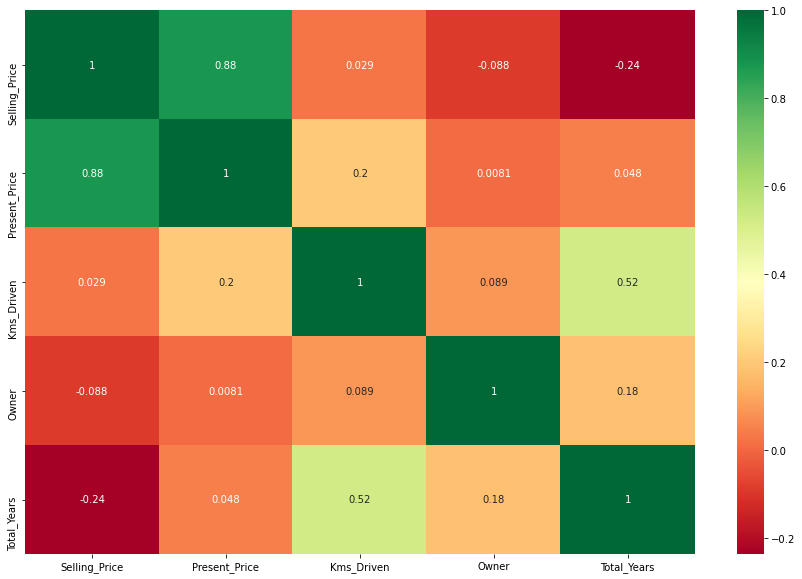

In [45]:
sns.heatmap(corr_mat, annot = True, cmap="RdYlGn")

In [ ]:
CGPA  ---> 93%     80%

# Create Dummy Variables

In [46]:
df_final.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4


## Dummy Encoding

In [47]:
df_final = pd.get_dummies(df_final, drop_first=True)

In [48]:
df_final

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [ ]:
Diesel Petrol  CNG
0      0       1


Diesel   Petrol
0        0 

# Splitting Independent variables and Target variable

In [50]:
features = df_final.iloc[:, 1:]

df_target = df_final.iloc[:,0]

In [51]:
features.head(3)

,Present_Price,Kms_Driven,Owner,Total_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1


In [52]:
df_target.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, np.log(df_target), test_size=0.3, random_state=10)

In [55]:
X_train.shape

(210, 8)

In [56]:
X_test.shape

(91, 8)

# Model Building

### Linear Regression

In [57]:
from sklearn.metrics import mean_squared_error

### Ordinary Least Squares

In [59]:
import statsmodels.api as sm

# building a model on the train dataset with an intercept

ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [61]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     180.6
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.10e-87
Time:                        21:00:01   Log-Likelihood:                -124.38
No. Observations:                 210   AIC:                             266.8
Df Residuals:                     201   BIC:                             296.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1